In [1]:
# 4. Семья
# Гипотеза: если хотя бы один из родителей имеет высшее образование, вероятность получения образования у ребёнка выше.


# Библиотеки

In [4]:
from dataframes import dataframes # словарь датафреймов, ключи: 2010, 2012, 2014, 2016, 2018, 2021, 2022.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Базовые цвета:
# красный 0, 
# оранжевый 1,
# желтый 2, 
# зеленый 3, 
# голубой 4, 
# синий 5, 
# фиолетовый 6, 
# ярко-розовый(пурпурная пицца:)) 7, 
# черный 8, 
# белый 9, 
# серый 10
colors = ["#FF0000", "#ffa400", "#fff300", "#00FF00", "#00deff", "#002fff", "#8900ff", "#ff00d1", "#000000", "#ffffff", "#757575"]

#Градиенты:
red_grad = ["#ff7575", "#FF0000", "#8a0000"]

orange_grad = ["#ffd280", "#ffa400", "#855500"]

yellow_grad = ["#fff97a", "#fff300", "#8a8300"]

green_grad = ["#70ff70", "#00FF00", "#008000"]

cyan_grad = ["#99f2ff", "#00deff", "#007385"]

blue_grad = ["#708bff", "#002fff", "#00146b"]

purple_grad = ["#c98aff", "#8900ff", "#c98aff"]

Необходимые переменные:
- "degree" - уровень образования
- "padeg" - уровень образования отца
- "madeg" - уровень образования матери

# Создание датафрейма

In [8]:
columns_to_extract = ['degree', 'padeg', 'madeg']  

dfs_list = []

for year, df in dataframes.items():
    
    if all(col in df.columns for col in columns_to_extract):
        
        selected = df[columns_to_extract].copy()
        selected['year'] = year
        dfs_list.append(selected)
    else:
        print(f"В датафрейме за {year} отсутствуют некоторые столбцы")

# Объединяем все датафреймы в один
df = pd.concat(dfs_list, ignore_index=True)
df.head()

# подсчет количества чистых строк (без NaN)
sum_nan = 0
sum_str = 0
nan_rows_count = df.isna().any(axis=1).sum()
print(f"Количество строк с NaN: {nan_rows_count}")
print(f"Количество строк: {df.shape[0]}")
sum_nan += nan_rows_count
sum_str += df.shape[0]
print(sum_str - sum_nan)

# очистка строк с NaN
df.dropna(inplace=True)

# Проверка на пропуски
print("Пропуски:")
print(df.isnull().sum())

# Просто проверка
sum_nan = 0
sum_str = 0
nan_rows_count = df.isna().any(axis=1).sum()
print(f"Количество строк с NaN после очистки: {nan_rows_count}")
print(f"Количество строк: {df.shape[0]}")
sum_nan += nan_rows_count
sum_str += df.shape[0]
print(sum_str - sum_nan)

Количество строк с NaN: 5694
Количество строк: 19952
14258
Пропуски:
degree    0
padeg     0
madeg     0
year      0
dtype: int64
Количество строк с NaN после очистки: 0
Количество строк: 14258
14258


# Создадим новые столбцы, где отберем, есть ли хотя бы один родитель с высшим образованием и есть ли у респондента высшее

In [11]:
# Высшее образование = >= 3
df['parent_ed'] = (df['madeg'] >= 3) | (df['padeg'] >= 3)
df['child_ed'] = df['degree'] >= 3
df['parent_ed'] = df['parent_ed'].astype(int)
df['child_ed'] = df['child_ed'].astype(int)
df.head()

,degree,padeg,madeg,year,parent_ed,child_ed
0,3.0,0.0,0.0,2010,0,1
1,3.0,4.0,0.0,2010,1,1
3,0.0,0.0,0.0,2010,0,0
5,0.0,0.0,0.0,2010,0,0
6,2.0,1.0,1.0,2010,0,0


In [13]:
print(df.describe())
print(df.groupby('parent_ed')['child_ed'].agg(['count']).round(3))

print(df.groupby('child_ed')['parent_ed'].agg(['count']).round(3))

             degree         padeg         madeg     parent_ed      child_ed
count  14258.000000  14258.000000  14258.000000  14258.000000  14258.000000
mean       1.933792      1.313368      1.251999      0.298569      0.392622
std        1.281939      1.283426      1.155436      0.457647      0.488351
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        1.000000      0.000000      0.000000      0.000000      0.000000
50%        1.000000      1.000000      1.000000      0.000000      0.000000
75%        3.000000      2.000000      1.000000      1.000000      1.000000
max        4.000000      4.000000      4.000000      1.000000      1.000000
           count
parent_ed       
0          10001
1           4257
          count
child_ed       
0          8660
1          5598


# Рассмотрим соотношение респондентов с разным уровнем высшего образования у родителей

In [16]:
df['parent_ed'].value_counts()

parent_ed
0    10001
1     4257
Name: count, dtype: int64

In [18]:
df['child_ed'].value_counts()

child_ed
0    8660
1    5598
Name: count, dtype: int64

<Figure size 1400x600 with 0 Axes>

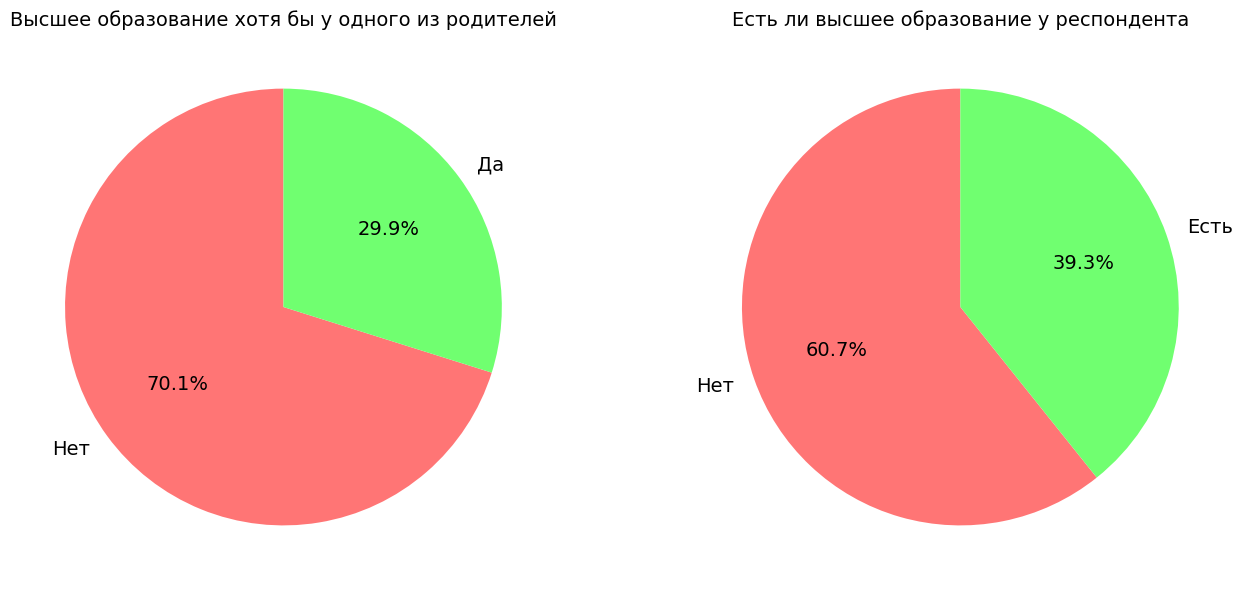

In [20]:
plt.figure(figsize=(14, 6))
fig, axes = plt.subplots(ncols=2, figsize=(14, 6))

category_counts = df['parent_ed'].value_counts()

axes[0].pie(category_counts,
        labels=[ "Нет", "Да"],  # Подписи секторов - названия категорий
        autopct='%1.1f%%',  # Формат процентов (один знак после запятой)
        startangle=90,  # Угол начала (90 градусов - вертикально вверх)
        colors=[red_grad[0], green_grad[0]],
        textprops={'fontsize': 14}) 
axes[0].set_title('Высшее образование хотя бы у одного из родителей', fontsize = 14)  # Заголовок диаграммы
axes[0].set_ylabel('') 

category_counts = df['child_ed'].value_counts()
axes[1].pie(category_counts,
        labels=["Нет", "Есть"],  # Подписи секторов - названия категорий
        autopct='%1.1f%%',  # Формат процентов (один знак после запятой)
        startangle=90,  # Угол начала (90 градусов - вертикально вверх)
        colors=[red_grad[0], green_grad[0]],
        textprops={'fontsize': 14}) 
axes[1].set_title('Есть ли высшее образование у респондента', fontsize = 14)  # Заголовок диаграммы
axes[1].set_ylabel('') 

plt.tight_layout()
plt.show()


# Спросим у таблицы сопряженности...

In [23]:
# Таблица сопряженности 
cross_table = pd.crosstab(df['parent_ed'], df['child_ed'], normalize='index') * 100

print(cross_table)

child_ed           0          1
parent_ed                      
0          71.772823  28.227177
1          34.813249  65.186751


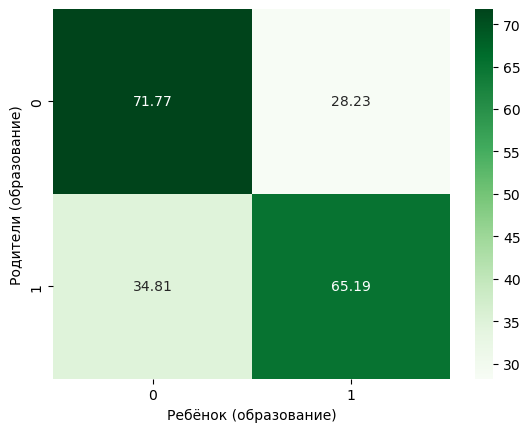

In [54]:
sns.heatmap(cross_table, annot=True, fmt='.2f', cmap='Greens')
plt.xlabel('Ребёнок (образование)')
plt.ylabel('Родители (образование)')
plt.show()

Таблица сопряженности показала:
- Если родители без высшего образования, то ~72% их детей тоже его не имеют.
- Если родители с высшим образованием, то ~65% их детей получили его.

Проверим наличие статистической связи между исследуемыми факторами - используем тест хи-квадрат.

In [40]:
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(cross_table)
print(f"p-value: {p_value}")

p-value: 3.4595924842923393e-07


Получаем p-value, близкое к 0, следовательно, между переменными действительно существует статистическая связь.

# Оценим вероятности

In [43]:
# Вероятность получения высшего образования ребенком, если хотя бы один родитель имеет высшее образование
ver_if_have_educ = cross_table.loc[1, 1] / cross_table.loc[1].sum()

# Вероятность получения высшего образования ребенком, если ни один родитель не имеет высшего образования
ver_if_donthave_educ = cross_table.loc[0, 1] / cross_table.loc[0].sum()

print(f"\nВероятность получения ВО, если хотя бы один родитель с ВО: {ver_if_have_educ:.2f}")
print(f"Вероятность получения ВО, если ни у кого из родителей нет ВО: {ver_if_donthave_educ:.2f}")


Вероятность получения ВО, если хотя бы один родитель с ВО: 0.65
Вероятность получения ВО, если ни у кого из родителей нет ВО: 0.28


Данные вероятности можно было увидеть в приведенной выше матрице.  
Гипотеза о том, что если хотя бы один из родителей имеет высшее образование, вероятность получения образования у ребёнка выше, подтвердилась.

# Графики по годам

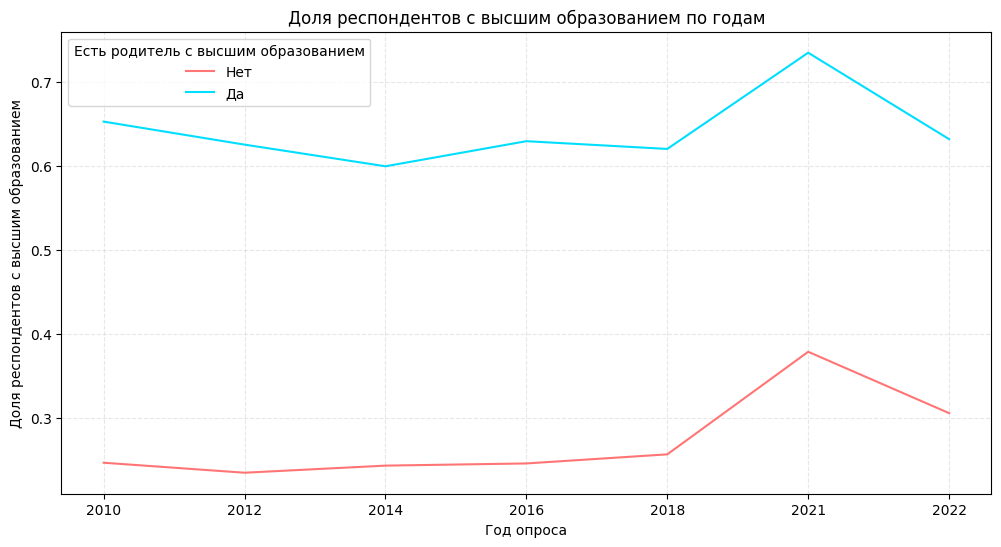

In [29]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='child_ed', hue='parent_ed', errorbar=None, palette = {0: red_grad[0], 1: cyan_grad[1]})
plt.title("Доля респондентов с высшим образованием по годам")
plt.xlabel("Год опроса")
plt.ylabel("Доля респондентов с высшим образованием")
plt.legend(title="Есть родитель с высшим образованием", labels = ["Нет", "Да"])
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# Выводы

* В ходе проведения данного исследования была построена матрица сопряженности, позволяющая сделать выводы о шансах на получение высшего образования ребенком, если таковым обладает хотя бы один из его родителей.
* Согласно таблице сопряженности, шанс на получение высшего образования у ребенка, родители которого не имеют высшего образования, составляет 28%. У ребенка, родители которого образование высшее имеют, шансы на получение его почти в 2 раза больше - 65%.
* Был выполнен тест хи-квадрат Пирсона, в результате которого был получен крайне низкое значение p-value, что позволяет говорить о наличие статистической связи между рассмотренными ранее переменными и о корректности наших выводов.


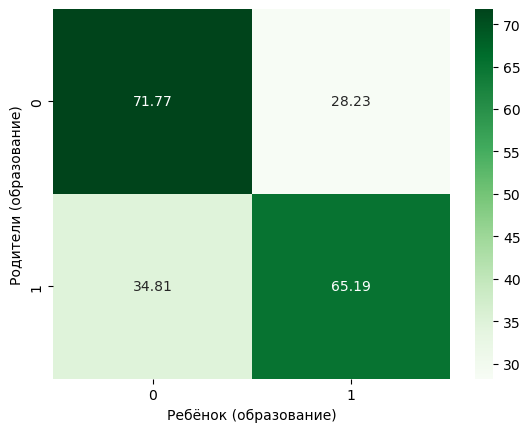

In [60]:
sns.heatmap(cross_table, annot=True, fmt='.2f', cmap='Greens')
plt.xlabel('Ребёнок (образование)')
plt.ylabel('Родители (образование)')
plt.show()

In [64]:
print('Критерий хи-квадрат Пирсона')
print(f"p-value: {p_value}")

Критерий хи-квадрат Пирсона
p-value: 3.4595924842923393e-07
